In [14]:
from bertopic import BERTopic
import json
import pandas as pd
import pyreadr
import tensorflow as tf

In [3]:
# Import the file
df = pd.read_csv("G:/OneDrive/Ecole/Articles/CAA_2024/Presentation_poster/Data_pre_process.csv")

In [4]:
#Select only the abstract content
df = df['text']

In [5]:
df

0      declassified corona satellite imagery collecte...
1      the application artificial intelligence ai too...
2      this article responds technofeminist calls unp...
3      determining maximum heating temperatures burnt...
4      we describe interdisciplinary approach compute...
                             ...                        
136    in field remote sensing rs identification trac...
137    archaeological site text main carrier present ...
138    concepts scale heart diverse scientific endeav...
139    the archeological sites heritage gained ancest...
140    virtual reality technology involves computer g...
Name: text, Length: 141, dtype: object

In [21]:
# Set the random seed for TensorFlow
tf.random.set_seed(1070)

# Prepare the BERT model
from bertopic.representation import KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", representation_model=representation_model)

In [23]:
# Run the BERT model
topics, probs = topic_model.fit_transform(df)

In [24]:
# Plot the categories cultured by the model
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,20,-1_classification_restoration_materials_archit...,"[classification, restoration, materials, archi...",[in recent years d models cultural heritage do...
1,0,63,0_lidar_maps_landscape_features,"[lidar, maps, landscape, features, imagery, ma...",[while remote sensing long widely prospection ...
2,1,40,1_recognition_classification_features_archaeol...,"[recognition, classification, features, archae...",[rock art carvings petroglyphs produced removi...
3,2,18,2_faunal_specimens_taxonomic_skeletal,"[faunal, specimens, taxonomic, skeletal, foren...",[accurate identification bone surface modifica...


In [25]:
# Plot a typical document from one category
topic_model.get_representative_docs(0)

['while remote sensing long widely prospection large areas task examining time consuming requires experienced specialist analysts however recent technological advances field artificial intelligence ai deep learning methods open possibilities automated analysis large areas remote sensing this paper examines applicability potential supervised deep learning methods detection mapping kinds sites comprising features walls linear curvilinear structures dimensions spectral geometrical properties our work deliberately open source imagery demonstrate accessibility tools one main challenges facing ai approaches require large amounts labeled achieve high levels accuracy training stage requires significant computational resources our results show limited amounts simple layer fully convolutional network trained efficiently minimal computational resources identify classify sites successfully distinguish features similar characteristics by increasing number training sets switching high performance co

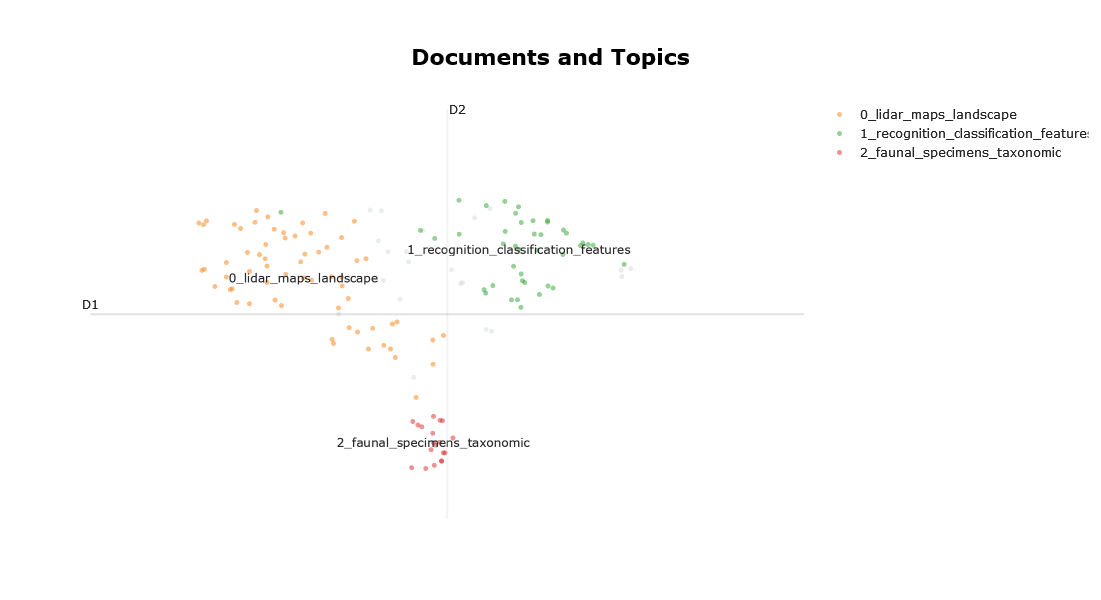

In [27]:
# Visualisation of the cluster
visualization = topic_model.visualize_documents(
    df,
    height=600
)
visualization